**Sebastian Gaviria Giraldo** \\
**C.C. 1017270713**

In [159]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

# **Cancelación sustractiva**

- 
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1} 
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función 
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados.

In [156]:
# Se define la función para la suma S(1)_N

def S1_N(x,N):
  
  '''
  Se hace una recursión para los valores de la suma, comenzando en S1 = 0 
  '''

  S1 = 0
  for n in range(1,2*N+1):
    numerador = (-1)**n * n
    denominador = n + 1
    S1+= numerador / denominador
  return S1


# Se define la función para la suma S(2)_N

def S2_N(x,N):
  
  '''  
  Primero se deben definir dos funciones internas, las cuales son dos sumas que se usarán para la suma final  
  '''  
  
  def S_21(x,N):
    S_21 = 0
    for n in range(1,N+1):
      numerador = 2*n
      denominador = 2*n + 1
      S_21+= numerador / denominador
    return S_21  #Esta función usa una recursión similar a la función S1_N() y retorna también una suma
  
  def S_22(x,N):
    S_22 = 0
    for n in range(1,N+1):
      numerador = 2*n - 1
      denominador = 2*n
      S_22+= numerador / denominador
    return S_22   #Esta función hace lo mismo que la anterior
  
  S2 = S_21(x,N) - S_22(x,N)    # Por último se acoplan, mediante una resta, las dos funciones para retornar el valor final 
  return S2


# Se define la función para la suma S(3)_N

def S3_N(x,N):
  
  '''
  Se hace una recursión para los valores de la suma, comenzando en S3 = 0, similar a la primera función definida 
  '''
  
  S3 = 0
  for n in range(1,N+1):
    denominador = 2*n * (2*n + 1)
    S3+= 1 / denominador
  return S3 


print(f"Con la primera suma se obtiene --> {S1_N(1,1000000)}")
print(f"Con la segunda suma se obtiene --> {S2_N(1,1000000)}")
print(f"Con la tercera suma (valor real) se obtiene --> {S3_N(1,1000000)}")

Con la primera suma se obtiene --> 0.3068525694401464
Con la segunda suma se obtiene --> 0.30685257457662374
Con la tercera suma (valor real) se obtiene --> 0.306852569440241


In [158]:
print( abs(S1_N(1,1000000) - S3_N(1,1000000)) )
print( abs(S2_N(1,1000000) - S3_N(1,1000000)) )

9.459100169806334e-14
5.136382763559766e-09


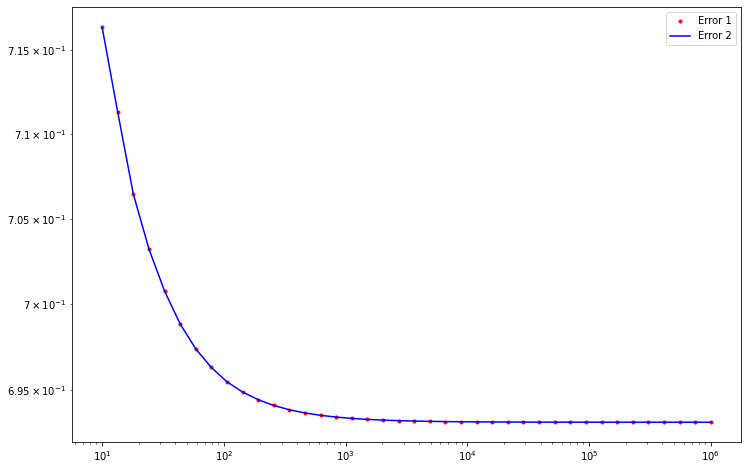

In [148]:
def E_1(n):
  E1 = abs(S3_N(x,n) - S1_N(x,n) / S3_N(x,n))
  return E1

def E_2(n):
  E2 = abs(S3_N(x,n) - S2_N(x,n) / S3_N(x,n))
  return E2

N = np.logspace( np.log10(10), np.log10(1E6), 40 )

def X():
  s = []
  for i in range(len(N)):
    a = E_1(int(N[i]))
    s.append(a)
  return np.array(s)

def Y():
  l = []
  for i in range(len(N)):
    b = E_2(int(N[i]))
    l.append(b)
  return np.array(l)

plt.figure(figsize=(12,8))
plt.loglog( N, X(), "r.", label = "Error 1" )
plt.loglog( N, Y(), "b-", label = "Error 2" )
plt.legend()
plt.show()

In [149]:
X() - Y() #Comparación entre error 1 y error 2

array([-5.10702591e-15, -9.21485110e-15,  4.66293670e-15, -7.54951657e-15,
        5.88418203e-15,  8.88178420e-15,  2.26485497e-14,  4.46309656e-14,
        1.24678046e-13, -1.48769885e-14,  9.85878046e-14, -4.25659508e-13,
       -3.12638804e-13, -1.07291953e-12,  2.15383267e-13,  4.67292871e-12,
        7.51332330e-12,  8.33944025e-12, -3.41038309e-12, -2.84698931e-11,
       -4.36648495e-11, -2.05733208e-11,  1.57431845e-11,  9.73581216e-11,
       -2.70390377e-11, -2.39090858e-10,  1.97077910e-11, -5.07832221e-10,
       -4.16916612e-10, -4.61451211e-10,  1.67834857e-09,  2.77398615e-09,
        1.07859188e-08,  1.74293865e-08,  1.53100964e-08,  1.00451081e-08,
        6.77926049e-09, -1.26127668e-08, -1.04582025e-08, -1.67392352e-08])

* Primero, vemos que para x = 1, la serie converge al número 0.306852569440241...
* Si hacemos una comparación en la convergencia con las primeras dos sumas respecto a la tercera, vemos que una serie tiene un error mayor que otro, pues sus ordenes de magnitud difieren.
* Nótese de las gráficas de cada error respecto a valores de N que, a medida que aumenta N, el error relativo disminuye para ambas relaciones (S(1)_N y S(2)_N).
* También de las gráficas se ve que el error relativo en cada suma es aproximadamente igual, los órdenes de magintud son muy bajos en el momento que la convergencia varía para cada suma.

# **Errores de redondeo**. Caos numérico en un mapa logístico y errores de punto flotante (Errores de redondeo)

> Un ejemplo clásico de caos,  es el comportamiento no lineal en las interaciones de un mapa logistico 

\begin{equation}
x_{n+1}=f(x_n)=rx_n(1-x_n)
\end{equation}

> con $x\in (0,1)$ y $r\in(0,4)$ se pueden producir varios comportamientos sorprendentes.


> ### Problema: 
Encontrar tres formas diferentes de expresar $f(x)$  y calcular la evolución de la misma condición inicial después de cientos de iteraciones. Para este problema, será extremadamente útil  ver sus resultados gráficamente; construya listas de números y llame la libreria matplotlib. 


>#### Hint: valores numéricos de r y x0 que puede tomar:


```python
    >>> r = [1.9, 2.9, 3.1, 3.5, 3.9]

    >>> x0 = 0.6 # any number in [0,1] will do here

    >>> numpoints = 100
       ```

In [9]:
def f_1(x,r):
  x = r * x - r * x**2
  return x

def f_2(x,r):
  x = r * (x - x**2)
  return x

def f_3(x,r):
  x = r * x * (x - x**2) / x
  return x

In [12]:
def mapa_logistico1(xi, r, Ntiempos):
  """
  Construye un array con la poblacion para un numero Ntiempos definido.
    xi: Poblacion inicial  
    r: tasa de crecimiento.
  Output
    poblacion_: Array con la Poblacion final
    """
  poblacion1 = np.zeros(Ntiempos)
  for i in range(0, Ntiempos):
    xn = f_1(xi, r)
    xi = xn
    poblacion1[i] = xn

  return poblacion1 

def mapa_logistico2(xi, r, Ntiempos):
  """
  Construye un array con la poblacion para un numero Ntiempos definido.
    xi: Poblacion inicial  
    r: tasa de crecimiento.
  Output
    poblacion_: Array con la Poblacion final
    """
  poblacion2 = np.zeros(Ntiempos)
  for i in range(0, Ntiempos):
    xn = f_2(xi, r)
    xi = xn
    poblacion2[i] = xn

  return poblacion2 

def mapa_logistico3(xi, r, Ntiempos):
  """
  Construye un array con la poblacion para un numero Ntiempos definido.
    xi: Poblacion inicial  
    r: tasa de crecimiento.
  Output
    poblacion_: Array con la Poblacion final
    """
  poblacion3 = np.zeros(Ntiempos)
  for i in range(0, Ntiempos):
    xn = f(xi, r)
    xi = xn
    poblacion3[i] = xn

  return poblacion3 

print(f"{mapa_logistico1(0.2,0.5,20)}\n")
print(f"{mapa_logistico2(0.2,0.5,20)}\n")
print(f"{mapa_logistico3(0.2,0.5,20)}\n")

[8.00000000e-02 3.68000000e-02 1.77228800e-02 8.70438976e-03
 4.31431168e-03 2.14784920e-03 1.07161797e-03 5.35234803e-04
 2.67474163e-04 1.33701310e-04 6.68417172e-05 3.34186247e-05
 1.67087539e-05 8.35423738e-06 4.17708379e-06 2.08853317e-06
 1.04426441e-06 5.22131657e-07 2.61065692e-07 1.30532812e-07]

[8.00000000e-02 3.68000000e-02 1.77228800e-02 8.70438976e-03
 4.31431168e-03 2.14784920e-03 1.07161797e-03 5.35234803e-04
 2.67474163e-04 1.33701310e-04 6.68417172e-05 3.34186247e-05
 1.67087539e-05 8.35423738e-06 4.17708379e-06 2.08853317e-06
 1.04426441e-06 5.22131657e-07 2.61065692e-07 1.30532812e-07]

[8.00000000e-02 3.68000000e-02 1.77228800e-02 8.70438976e-03
 4.31431168e-03 2.14784920e-03 1.07161797e-03 5.35234803e-04
 2.67474163e-04 1.33701310e-04 6.68417172e-05 3.34186247e-05
 1.67087539e-05 8.35423738e-06 4.17708379e-06 2.08853317e-06
 1.04426441e-06 5.22131657e-07 2.61065692e-07 1.30532812e-07]



In [155]:
Ntiempos = 25
N = np.arange(0, Ntiempos, 1)
r = np.linspace(0, 4.0, 100)

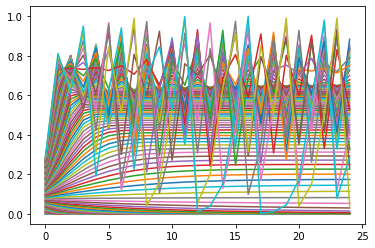

In [156]:
for i in range(0, len(r) ):

  p1 = mapa_logistico1( 0.923456, r[i], Ntiempos )
  plt.plot( N, p1 )
plt.show()

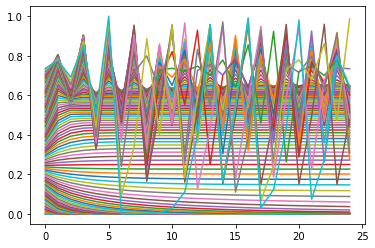

In [157]:
for i in range(0, len(r) ):
  p2 = mapa_logistico2(0.756980, r[i], Ntiempos)
  plt.plot( N, p2 )
plt.show()

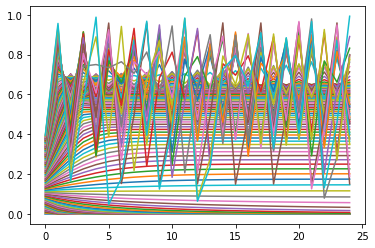

In [158]:
for i in range(0, len(r) ):
  p3 = mapa_logistico3(0.111334, r[i], Ntiempos)
  plt.plot( N, p3 )
plt.show()